
# IMPACT OF ESG PERFORMANCE ON FINANCIAL PERFORMANCE

# Master Thesis Project

------------------------

## Python Script 

------------------------

#### Supervisor 	
Irene Unceta Mendieta, irene.unceta@esade.edu

#### Student
Nicolas Niederberger, nicolas.niederberger@alumni.esade.edu

-------------------------

ESADE Business School

Barcelona, October 4, 2021

# Rearrange raw data files retrieved from Bloomberg

Importing all open source data analysis and manipulation tools and libraries used within the script.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
import seaborn as sns
from sklearn.impute import KNNImputer
import sklearn as sk
import datetime
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import numpy as np

Read file with raw data points retrieved from Bloomberg starting from the year 2015 until end of 2020.

In [4]:
df = pd.read_excel('20211004_Data Repository_Master Thesis Project_Nicolas Niederberger_vf.xlsx', 
                   sheet_name = '9. SXXP 600 31.12.2015-2020_raw', header=3)
df

,Unnamed: 0,Unnamed: 1,Dates,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00,2015-12-31 00:00:00
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,-0.2465,12.7233,13.0039,12.6042,7.6045,3.0612
1,NaN,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,46.6942,46.2810,46.6942,46.6942,42.1488,35.5372
2,NaN,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,57.1429,57.1429,57.1429,60.7143,62.5000,48.2143
3,NaN,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,41.8605,42.6357,43.4109,41.8605,31.0078,29.4574
4,NaN,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,47.3684,43.8596,43.8596,43.8596,47.3684,36.8421
...,...,...,...,...,...,...,...,...,...
8395,NaN,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,29.0000,14.0000,20.0000,17.0000,NaN,NaN
8396,NaN,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,32.0000,21.0000,26.0000,19.0000,NaN,NaN
8397,NaN,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,16.0000,14.0000,13.0000,2.0000,NaN,NaN
8398,NaN,Number of Employees,NUM_OF_EMPLOYEES,12870.0000,15678.0000,16714.0000,17339.0000,17757.0000,18327.0000


Rename columns to rearrange the data structure.

In [5]:
df.rename(columns={'Unnamed: 0': 'Securities', 'Unnamed: 1': 'Variable_description', 'Dates':'Variable_code'}, inplace = True)
df

,Securities,Variable_description,Variable_code,2020-12-31 00:00:00,2019-12-31 00:00:00,2018-12-31 00:00:00,2017-12-29 00:00:00,2016-12-30 00:00:00,2015-12-31 00:00:00
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,-0.2465,12.7233,13.0039,12.6042,7.6045,3.0612
1,NaN,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,46.6942,46.2810,46.6942,46.6942,42.1488,35.5372
2,NaN,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,57.1429,57.1429,57.1429,60.7143,62.5000,48.2143
3,NaN,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,41.8605,42.6357,43.4109,41.8605,31.0078,29.4574
4,NaN,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,47.3684,43.8596,43.8596,43.8596,47.3684,36.8421
...,...,...,...,...,...,...,...,...,...
8395,NaN,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,29.0000,14.0000,20.0000,17.0000,NaN,NaN
8396,NaN,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,32.0000,21.0000,26.0000,19.0000,NaN,NaN
8397,NaN,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,16.0000,14.0000,13.0000,2.0000,NaN,NaN
8398,NaN,Number of Employees,NUM_OF_EMPLOYEES,12870.0000,15678.0000,16714.0000,17339.0000,17757.0000,18327.0000


Fill in blanks in column "Securities" with the corresponding security names and check for NA values.

In [6]:
df['Securities'] = df['Securities'].fillna(method = "ffill")

df.isna().sum()

Securities                 0
Variable_description       0
Variable_code              0
2020-12-31 00:00:00      440
2019-12-31 00:00:00      555
2018-12-31 00:00:00      801
2017-12-29 00:00:00     1052
2016-12-30 00:00:00     1550
2015-12-31 00:00:00     2991
dtype: int64

Rearrange data points to bring date values from columns to axes.

In [7]:
final_df = pd.melt(df, id_vars=['Securities','Variable_description','Variable_code'],var_name='date')

final_df

,Securities,Variable_description,Variable_code,date,value
0,CSP LN Equity,Return on Assets,RETURN_ON_ASSET,2020-12-31,-0.2465
1,CSP LN Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2020-12-31,46.6942
2,CSP LN Equity,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,2020-12-31,57.1429
3,CSP LN Equity,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,2020-12-31,41.8605
4,CSP LN Equity,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,2020-12-31,47.3684
...,...,...,...,...,...
50395,PEO PW Equity,S&P Global Environmental Dimension Rank,ROBECOSAM_ENV_DIMENSION_RANK,2015-12-31,NaN
50396,PEO PW Equity,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,2015-12-31,NaN
50397,PEO PW Equity,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,2015-12-31,NaN
50398,PEO PW Equity,Number of Employees,NUM_OF_EMPLOYEES,2015-12-31,18327.0000


Ascend order of values in column "Variable_code" and "date" for better visualization of data.

In [8]:
final_df.sort_values(by=["Securities", "Variable_description", 'date'], ascending = False, inplace = True)

final_df

,Securities,Variable_description,Variable_code,date,value
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299
...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248


# Include one year lag for financial performance variables

Reduce year dates of variables "Return on Assets" and "Tobin's Q Ratio" by 1 year to reflect the one year lag between ESG and financial performance in the data set. After the modification, we will no longer need the Financial Performance related data of 2014 and the ESG Performance related data of 2020.

E.g.: If we want to analyse the ESG Performance of 2015, literature suggests to analyse the correlation to the Financial Performance of 2016, since the effects are reflected in the data with a one year lag. Therefore, we reduce the dates of the Financial Performance related variables by one year.

Add the column "year" since the exact date is not needed for the analysis and year is easier to work with.

In [10]:
final_df['year'] = pd.DatetimeIndex(final_df['date']).year

final_df

,Securities,Variable_description,Variable_code,date,value,year
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016


Reduce variables by one year and save in new column.

In [11]:
final_df['year_updated'] = final_df.loc[(final_df['Variable_code'] == 'TOBIN_Q_RATIO') | (final_df['Variable_code'] == 'RETURN_ON_ASSET') , 'year'] - 1

final_df

,Securities,Variable_description,Variable_code,date,value,year,year_updated
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020,NaN
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019,NaN
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018,NaN
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017,NaN
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016,NaN
...,...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019,NaN
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018,NaN
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017,NaN
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016,NaN


Fill in NaN values in newly created column with old values. Then, rename and drop the columns to have a similar data frame structure as before. Moreover, change data type to integer going forward.

In [12]:
final_df.year_updated.fillna(final_df.year, inplace=True)

In [13]:
final_df['year'] = final_df['year_updated']

In [14]:
final_df = final_df.drop('year_updated',1)

In [15]:
final_df['year'] = final_df['year'].astype(int)

In [16]:
final_df['year']

8156     2020
16556    2019
24956    2018
33356    2017
41756    2016
         ... 
14281    2019
22681    2018
31081    2017
39481    2016
47881    2015
Name: year, Length: 50400, dtype: int32

In [17]:
print(final_df.dtypes)

Securities                      object
Variable_description            object
Variable_code                   object
date                    datetime64[ns]
value                          float64
year                             int32
dtype: object


# Fill in missing values with KNN method

Check the amount of missing values and demonstrate why the KNN method is applied to replace the missing values instead of other methods such as replacement through mean oder median values.

In the following section, a data set with independent variable "Return on Assets" and one dependent variable "ESG Disclosure Score" from 2019 is created and four methods (KNN = 15, KNN = 5, mean, median) to replace missing values are visualized. With that analysis, we try to deduct the most accurate method before training the Multivariate Linear Regression.

In [18]:
final_df.isnull().sum(axis = 0)

Securities                 0
Variable_description       0
Variable_code              0
date                       0
value                   7389
year                       0
dtype: int64

In [19]:
final_df

,Securities,Variable_description,Variable_code,date,value,year
8156,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2020-12-31,3.6098,2020
16556,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2019-12-31,3.4389,2019
24956,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2018-12-31,3.0384,2018
33356,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2017-12-29,2.5551,2017
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
...,...,...,...,...,...,...
14281,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2019-12-31,58.2645,2019
22681,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2018-12-31,59.0909,2018
31081,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2017-12-29,59.5041,2017
39481,1COV GY Equity,ESG Disclosure Score,ESG_DISCLOSURE_SCORE,2016-12-30,57.0248,2016


In [20]:
ESGDS_2019= final_df.loc[((final_df['year'] == 2019) & 
                          (final_df['Variable_code'] == 'ESG_DISCLOSURE_SCORE'),
                           'value')]

ESGDS_2019

ESGDS_2019.isnull().sum(axis = 0)

31

In [21]:
ROA_2019 = final_df.loc[((final_df['year'] == 2019) & 
                          (final_df['Variable_code'] == 'RETURN_ON_ASSET'),
                           'value')]

ROA_2019

ROA_2019.isnull().sum(axis = 0)

1

Create data set with independent variable "Return on Assets" and one dependent variable "ESG Disclosure Score" from 2019.

In [22]:
Missing_values = pd.DataFrame(list(zip(ESGDS_2019, ROA_2019)), columns = ['ESGDS_2019', 'ROA_2019'])

Missing_values

Missing_values.isnull().sum(axis = 0)

ESGDS_2019    31
ROA_2019       1
dtype: int64

We find 31 missing values for ESGD which need to be replaced. The missing values for ROA for this preliminary verification of the method are disregarded.

### KNN

The KNN tool from SKlearn to fill in missing values is applied. KNN can be understood as the average of N data points within the data set closest for each missing value. It is analysing data points within the same variable as well as other variables where no data is missing (e.g. revenue, number of employees, environmental, social or governance disclosure score etc.) underlying in the data set and finds through their correlation the most accurate value for the missing value. It was found that most commonly, N = 15 should provide best results in the analysis. In our analysis, we try to visualize N = 15 and N = 5.

E.g. if you have 10 missing values, you look at the overall data distribution of all variables within the data set available. Then, for each of those 10 missing values, the 5/15 closest points are taken and averaged to replace it. 

N = 15:

In [23]:
imputer = KNNImputer(n_neighbors = 15, weights = 'distance') # Numero  optimo
KNN_df = imputer.fit_transform(Missing_values)
dataset_2 = pd.DataFrame(KNN_df)
dataset_2

#dataset_2.to_csv('KNN.csv')

,0,1
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


N = 5:

In [24]:
imputer=KNNImputer(n_neighbors=5,weights='distance') 
KNN_df = imputer.fit_transform(Missing_values)
dataset_3 = pd.DataFrame(KNN_df)
dataset_3

,0,1
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


In [25]:
Missing_values

,ESGDS_2019,ROA_2019
0,51.3158,0.9085
1,48.7603,4.1762
2,56.1983,4.1404
3,36.3636,-10.9059
4,64.8760,2.1219
...,...,...
595,35.9504,3.4907
596,58.6777,3.5202
597,52.8926,6.9164
598,60.3306,3.1720


Create 4 new columns in dataframe "Missing Values" for each of the four methods conducted.

(1) KNN with 15
(2) KNN with 5
(3) Median of values
(4) Mean of values

In [26]:
Missing_values['ESGDS_2019_missing_knn_15'] = dataset_2.loc[:,0]
Missing_values['ESGDS_2019_missing_knn_5'] = dataset_3.loc[:,0]
Missing_values['ESGDS_2019_missing_median'] = Missing_values['ESGDS_2019'].fillna(Missing_values['ESGDS_2019'].median())
Missing_values['ESGDS_2019_missing_mean'] = Missing_values['ESGDS_2019'].fillna(Missing_values['ESGDS_2019'].mean())

Missing_values

,ESGDS_2019,ROA_2019,ESGDS_2019_missing_knn_15,ESGDS_2019_missing_knn_5,ESGDS_2019_missing_median,ESGDS_2019_missing_mean
0,51.3158,0.9085,51.3158,51.3158,51.3158,51.3158
1,48.7603,4.1762,48.7603,48.7603,48.7603,48.7603
2,56.1983,4.1404,56.1983,56.1983,56.1983,56.1983
3,36.3636,-10.9059,36.3636,36.3636,36.3636,36.3636
4,64.8760,2.1219,64.8760,64.8760,64.8760,64.8760
...,...,...,...,...,...,...
595,35.9504,3.4907,35.9504,35.9504,35.9504,35.9504
596,58.6777,3.5202,58.6777,58.6777,58.6777,58.6777
597,52.8926,6.9164,52.8926,52.8926,52.8926,52.8926
598,60.3306,3.1720,60.3306,60.3306,60.3306,60.3306


Create a final column with a flag for missing ESGD values (i.e. True for missing values, otherwise False)

In [28]:
Missing_values['Missing Values'] = Missing_values['ESGDS_2019'].isna()

Missing_values

,ESGDS_2019,ROA_2019,ESGDS_2019_missing_knn_15,ESGDS_2019_missing_knn_5,ESGDS_2019_missing_median,ESGDS_2019_missing_mean,Missing Values
0,51.3158,0.9085,51.3158,51.3158,51.3158,51.3158,False
1,48.7603,4.1762,48.7603,48.7603,48.7603,48.7603,False
2,56.1983,4.1404,56.1983,56.1983,56.1983,56.1983,False
3,36.3636,-10.9059,36.3636,36.3636,36.3636,36.3636,False
4,64.8760,2.1219,64.8760,64.8760,64.8760,64.8760,False
...,...,...,...,...,...,...,...
595,35.9504,3.4907,35.9504,35.9504,35.9504,35.9504,False
596,58.6777,3.5202,58.6777,58.6777,58.6777,58.6777,False
597,52.8926,6.9164,52.8926,52.8926,52.8926,52.8926,False
598,60.3306,3.1720,60.3306,60.3306,60.3306,60.3306,False


Visualizing with the help of sns.scatterplot how the missing values are distributed and what method is most accurate to be applied.

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGDS_2019_missing_knn_15'>

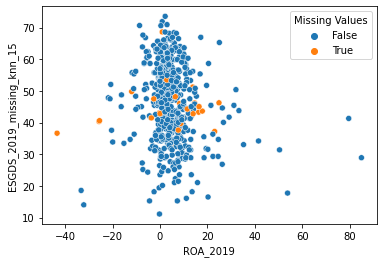

In [29]:
#KNN 15

sns.scatterplot(data = Missing_values, x = "ROA_2019", y = "ESGDS_2019_missing_knn_15", hue = 'Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGDS_2019_missing_knn_5'>

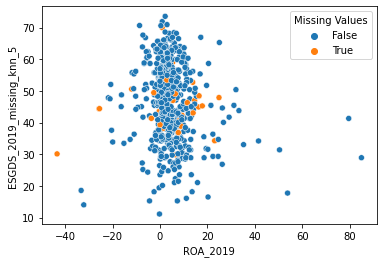

In [30]:
#KNN 5

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGDS_2019_missing_knn_5",hue='Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGDS_2019_missing_median'>

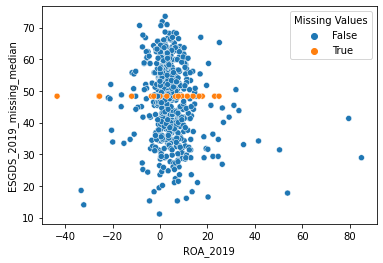

In [31]:
#Median

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGDS_2019_missing_median",hue='Missing Values')

<AxesSubplot:xlabel='ROA_2019', ylabel='ESGDS_2019_missing_mean'>

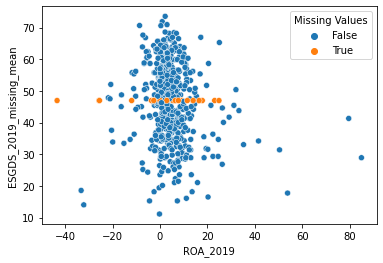

In [32]:
#Mean

sns.scatterplot(data=Missing_values, x="ROA_2019", y="ESGDS_2019_missing_mean",hue='Missing Values')

To sum it up, it can be stated that the KNN = 15 method visualizes the distribution of the underlying data set most accurately and therefore, this method is applied to fill in the missing values of the data set overall.

In simpler words, the scatterplot which shows the least amount of orange (i.e. True for missing) and that is reflecting the most similar pattern to the blue points is the most accurate one. In the above case, it is KNN = 15.

# Save data from different years as separate tabs before training the Multivariate Linear Regression analysis

In [33]:
year_unique = final_df['year'].unique()
year_unique 

array([2020, 2019, 2018, 2017, 2016, 2015, 2014])

As explained above, we will no longer need the years 2014 and 2020 for the analysis. Therefore, we are removing these from the "year_unique" variable.

In [34]:
year_unique = year_unique[1:-1]

year_unique

array([2019, 2018, 2017, 2016, 2015])

Looking into the dataframe for year 2016 (python starts counting at value "0").

In [36]:
final_df[final_df['year']==year_unique[3]]

,Securities,Variable_description,Variable_code,date,value,year
41756,ZURN SE Equity,Total Debt to Total Assets,TOT_DEBT_TO_TOT_ASSET,2016-12-30,2.9299,2016
33355,ZURN SE Equity,Tobin's Q Ratio,TOBIN_Q_RATIO,2017-12-29,1.0309,2016
41752,ZURN SE Equity,Social Disclosure Score,SOCIAL_DISCLOSURE_SCORE,2016-12-30,46.6667,2016
41758,ZURN SE Equity,S&P Global Social Dimension Rank,ROBECOSAM_SOCIAL_DIMENSION_RANK,2016-12-30,89.0000,2016
41759,ZURN SE Equity,S&P Global Governance & Economic Dimension Rank,ROBECOSAM_ECON_DIMENSION_RANK,2016-12-30,95.0000,2016
...,...,...,...,...,...,...
39486,1COV GY Equity,R & D Expenditure to Net Sales,RD_EXPEND_TO_NET_SALES,2016-12-30,2.1757,2016
39492,1COV GY Equity,Number of Employees,NUM_OF_EMPLOYEES,2016-12-30,15122.0000,2016
39482,1COV GY Equity,Governance Disclosure Score,GOVNCE_DISCLOSURE_SCORE,2016-12-30,46.4286,2016
39483,1COV GY Equity,Environmental Disclosure Score,ENVIRON_DISCLOSURE_SCORE,2016-12-30,58.9147,2016


Saving the data into five different worksheets filtered for each of the five years 2015, 2016, 2017, 2018 and 2019. These will be saved into a pre-defined excel which will be used further for the training of the Multivariate Linear Regression model.

In [37]:
pd.DataFrame({'a':[0,1]}).to_excel('Output Python_Data Preparation.xlsx')

In [38]:
with pd.ExcelWriter('Output Python_Data Preparation.xlsx') as writer:
  for i in year_unique:
    final_df[final_df['year']==i].to_excel(writer, sheet_name=str(i), index=False)

# Read data for different years and replace missing values with KNN method

Read the different worksheets and create separate dataframes.

In [39]:
df_2015 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2015')

df_2016 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2016')

df_2017 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2017')

df_2018 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2018')

df_2019 = pd.read_excel('Output Python_Data Preparation.xlsx', 
                   sheet_name = '2019')

Transpose the dataframes and check for missing values.

In [40]:
df_2015 = df_2015.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2016 = df_2016.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2017 = df_2017.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2018 = df_2018.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2019 = df_2019.pivot(index = 'Securities',columns= 'Variable_description', values='value')

df_2015

Variable_description,ESG Disclosure Score,Environmental Disclosure Score,Governance Disclosure Score,Number of Employees,R & D Expenditure to Net Sales,Return on Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Social Disclosure Score,Tobin's Q Ratio,Total Debt to Total Assets
Securities,,,,,,,,,,,,,,
1COV GY Equity,51.2397,54.2636,41.0714,15761.0,2.1271,7.6571,12082.0000,NaN,NaN,NaN,NaN,54.3860,1.8804,27.0630
A2A IM Equity,56.6116,54.2636,42.8571,12298.0,0.0000,2.2984,4732.0000,NaN,NaN,NaN,NaN,75.4386,1.1057,38.5777
AAK SS Equity,52.4793,50.3876,57.1429,2738.0,0.0000,6.4543,20114.0000,NaN,NaN,NaN,NaN,52.6316,2.0376,17.4079
AAL LN Equity,56.1983,48.8372,76.7857,91000.0,0.4058,3.1205,20455.0000,NaN,NaN,NaN,NaN,52.6316,0.9859,34.5433
AALB NA Equity,16.9421,6.9767,48.2143,14709.0,0.0000,6.5221,2475.3000,NaN,NaN,NaN,NaN,8.7719,1.7121,27.8459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRT1V FH Equity,65.2893,62.7907,73.2143,18856.0,2.6248,6.4117,5029.0000,NaN,NaN,NaN,NaN,63.1579,2.1371,12.9182
WTB LN Equity,33.8843,20.1550,60.7143,41175.0,0.0000,9.2719,2921.8000,NaN,NaN,NaN,NaN,38.5965,1.9542,21.9486
YAR NO Equity,55.7851,50.3876,66.0714,12883.0,0.1491,5.3140,13420.7265,NaN,NaN,NaN,NaN,57.8947,1.1523,12.6953


Check for missing data. Interestingly, data availability increased substantially from 2015 to 2019.

In [41]:
df_2015.isnull().sum(axis = 0)

Variable_description
ESG Disclosure Score                                60
Environmental Disclosure Score                      84
Governance Disclosure Score                         60
Number of Employees                                 31
R & D Expenditure to Net Sales                     158
Return on Assets                                    25
Revenue                                             24
S&P Global ESG Rank                                600
S&P Global Environmental Dimension Rank            600
S&P Global Governance & Economic Dimension Rank    600
S&P Global Social Dimension Rank                   600
Social Disclosure Score                             64
Tobin's Q Ratio                                     40
Total Debt to Total Assets                          25
dtype: int64

Remove securities from sample where financial performance values are missing and create new data set including all five years.

In [42]:
df_2015.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2016.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2017.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2018.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)
df_2019.dropna(subset = ["Return on Assets", "Tobin's Q Ratio"], inplace=True)

In [44]:
df_2015_2019 = pd.concat([df_2015, df_2016, df_2017, df_2018,df_2019], axis=0)

df_2015_2019

Variable_description,ESG Disclosure Score,Environmental Disclosure Score,Governance Disclosure Score,Number of Employees,R & D Expenditure to Net Sales,Return on Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Social Disclosure Score,Tobin's Q Ratio,Total Debt to Total Assets
Securities,,,,,,,,,,,,,,
1COV GY Equity,51.2397,54.2636,41.0714,15761.0,2.1271,7.6571,12082.0,NaN,NaN,NaN,NaN,54.3860,1.8804,27.0630
A2A IM Equity,56.6116,54.2636,42.8571,12298.0,0.0000,2.2984,4732.0,NaN,NaN,NaN,NaN,75.4386,1.1057,38.5777
AAK SS Equity,52.4793,50.3876,57.1429,2738.0,0.0000,6.4543,20114.0,NaN,NaN,NaN,NaN,52.6316,2.0376,17.4079
AAL LN Equity,56.1983,48.8372,76.7857,91000.0,0.4058,3.1205,20455.0,NaN,NaN,NaN,NaN,52.6316,0.9859,34.5433
AALB NA Equity,16.9421,6.9767,48.2143,14709.0,0.0000,6.5221,2475.3,NaN,NaN,NaN,NaN,8.7719,1.7121,27.8459
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRT1V FH Equity,64.8760,64.3411,67.8571,18795.0,3.1721,2.1219,5170.0,90.0,91.0,91.0,85.0,63.1579,1.4245,17.1304
WTB LN Equity,36.3636,27.1318,60.7143,36034.0,0.0000,-10.9059,2071.5,93.0,80.0,100.0,93.0,33.3333,1.0937,44.0368
YAR NO Equity,56.1983,51.1628,66.0714,16033.0,0.4666,4.1404,12858.0,39.0,33.0,40.0,31.0,57.8947,1.1690,24.0658


Check for missing values in new data set without NA year observations in variables "Tobin's Q" and "ROA".

In [47]:
df_2015_2019.isnull().sum(axis = 0)

Variable_description
ESG Disclosure Score                                106
Environmental Disclosure Score                      157
Governance Disclosure Score                         106
Number of Employees                                  22
R & D Expenditure to Net Sales                      635
Return on Assets                                      0
Revenue                                               1
S&P Global ESG Rank                                1108
S&P Global Environmental Dimension Rank            1108
S&P Global Governance & Economic Dimension Rank    1108
S&P Global Social Dimension Rank                   1108
Social Disclosure Score                             113
Tobin's Q Ratio                                       0
Total Debt to Total Assets                            0
dtype: int64

Replace missing values for ESGP variables with KNN = 15 method

In [48]:
ML_data_2015 = df_2015.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]
ML_data_2016 = df_2016.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]
ML_data_2017 = df_2017.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]
ML_data_2018 = df_2018.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]
ML_data_2019 = df_2019.loc[:,['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', 'S&P Global ESG Rank', 'S&P Global Environmental Dimension Rank', 'S&P Global Governance & Economic Dimension Rank', 'S&P Global Social Dimension Rank', 'Return on Assets', "Tobin's Q Ratio", "R & D Expenditure to Net Sales", "Total Debt to Total Assets", "Revenue"]]

ML_data_2015

Variable_description,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
Securities,,,,,,,,,,,,,
1COV GY Equity,51.2397,54.2636,54.3860,41.0714,NaN,NaN,NaN,NaN,7.6571,1.8804,2.1271,27.0630,12082.0000
A2A IM Equity,56.6116,54.2636,75.4386,42.8571,NaN,NaN,NaN,NaN,2.2984,1.1057,0.0000,38.5777,4732.0000
AAK SS Equity,52.4793,50.3876,52.6316,57.1429,NaN,NaN,NaN,NaN,6.4543,2.0376,0.0000,17.4079,20114.0000
AAL LN Equity,56.1983,48.8372,52.6316,76.7857,NaN,NaN,NaN,NaN,3.1205,0.9859,0.4058,34.5433,20455.0000
AALB NA Equity,16.9421,6.9767,8.7719,48.2143,NaN,NaN,NaN,NaN,6.5221,1.7121,0.0000,27.8459,2475.3000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
WRT1V FH Equity,65.2893,62.7907,63.1579,73.2143,NaN,NaN,NaN,NaN,6.4117,2.1371,2.6248,12.9182,5029.0000
WTB LN Equity,33.8843,20.1550,38.5965,60.7143,NaN,NaN,NaN,NaN,9.2719,1.9542,0.0000,21.9486,2921.8000
YAR NO Equity,55.7851,50.3876,57.8947,66.0714,NaN,NaN,NaN,NaN,5.3140,1.1523,0.1491,12.6953,13420.7265


In [49]:
#2015

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2015 = imputer.fit_transform(ML_data_2015)
ML_df_2015_vf = pd.DataFrame(ML_df_2015)

ML_df_2015_vf

,0,1,2,3,4,5,6,7,8
0,51.2397,54.2636,54.3860,41.0714,7.6571,1.8804,2.127100,27.0630,12082.0000
1,56.6116,54.2636,75.4386,42.8571,2.2984,1.1057,0.000000,38.5777,4732.0000
2,52.4793,50.3876,52.6316,57.1429,6.4543,2.0376,0.000000,17.4079,20114.0000
3,56.1983,48.8372,52.6316,76.7857,3.1205,0.9859,0.405800,34.5433,20455.0000
4,16.9421,6.9767,8.7719,48.2143,6.5221,1.7121,0.000000,27.8459,2475.3000
...,...,...,...,...,...,...,...,...,...
554,65.2893,62.7907,63.1579,73.2143,6.4117,2.1371,2.624800,12.9182,5029.0000
555,33.8843,20.1550,38.5965,60.7143,9.2719,1.9542,0.000000,21.9486,2921.8000
556,55.7851,50.3876,57.8947,66.0714,5.3140,1.1523,0.149100,12.6953,13420.7265
557,27.6860,21.7054,31.5789,37.5000,5.1776,3.9806,0.000000,4.4082,2958.1000


We find 4 columns less in the data set for 2015 because there is no data available for the S&P variables in 2015. Therefore, these variables are removed from here on going forward.

In [50]:
#2016

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2016 = imputer.fit_transform(ML_data_2016)
ML_df_2016_vf = pd.DataFrame(ML_df_2016)

#ML_df_2016_vf

In [51]:
#2017

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2017 = imputer.fit_transform(ML_data_2017)
ML_df_2017_vf = pd.DataFrame(ML_df_2017)

#ML_df_2017_vf

In [52]:
#2018

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2018 = imputer.fit_transform(ML_data_2018)
ML_df_2018_vf = pd.DataFrame(ML_df_2018)

#ML_df_2018_vf

In [53]:
#2019

imputer=KNNImputer(n_neighbors=15,weights='distance')
ML_df_2019 = imputer.fit_transform(ML_data_2019)
ML_df_2019_vf = pd.DataFrame(ML_df_2019)

ML_df_2019_vf

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,58.2645,60.4651,54.3860,57.1429,27.0,23.0,20.0,43.0,3.7558,1.3206,2.143100,15.1242,12412.0
1,60.3306,55.8140,71.9298,58.9286,66.0,72.0,66.0,66.0,3.1720,1.0424,0.000000,33.6690,7122.0
2,52.8926,50.3876,49.1228,62.5000,33.0,33.0,36.0,41.0,6.9164,2.4678,0.000000,20.2539,28510.0
3,58.6777,51.1628,57.8947,76.7857,93.0,93.0,87.0,88.0,3.5202,1.2427,0.358200,19.1160,29870.0
4,35.9504,32.5581,28.0702,51.7857,63.0,53.0,71.0,53.0,3.4907,1.6938,0.000000,23.4591,2841.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,64.8760,64.3411,63.1579,67.8571,90.0,91.0,91.0,85.0,2.1219,1.4245,3.172100,17.1304,5170.0
588,36.3636,27.1318,33.3333,60.7143,93.0,80.0,100.0,93.0,-10.9059,1.0937,0.000000,44.0368,2071.5
589,56.1983,51.1628,57.8947,66.0714,39.0,33.0,40.0,31.0,4.1404,1.1690,0.466600,24.0658,12858.0
590,48.7603,42.6357,50.8772,60.7143,64.0,69.0,55.0,61.0,4.1762,4.2513,1.056700,15.8616,6482.6


In [54]:
ML_df_2015_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'Return on Assets',5:"Tobin's Q Ratio", 6:"R & D Expenditure to Net Sales",7: "Total Debt to Total Assets", 8:"Revenue"}, inplace = True)
#2015 has a slightly reduced code because no S&P data is available in that year.

ML_df_2016_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio", 10:"R & D Expenditure to Net Sales",11: "Total Debt to Total Assets", 12:"Revenue"}, inplace = True)
ML_df_2017_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio", 10:"R & D Expenditure to Net Sales",11: "Total Debt to Total Assets", 12:"Revenue"}, inplace = True)
ML_df_2018_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio", 10:"R & D Expenditure to Net Sales",11: "Total Debt to Total Assets", 12:"Revenue"}, inplace = True)
ML_df_2019_vf.rename(columns={0: 'ESG Disclosure Score', 1: 'Environmental Disclosure Score', 2:'Social Disclosure Score',3:'Governance Disclosure Score',4:'S&P Global ESG Rank',5:'S&P Global Environmental Dimension Rank',6:'S&P Global Governance & Economic Dimension Rank',7:'S&P Global Social Dimension Rank',8:'Return on Assets',9:"Tobin's Q Ratio", 10:"R & D Expenditure to Net Sales",11: "Total Debt to Total Assets", 12:"Revenue"}, inplace = True)

ML_df_2015_vf

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue
0,51.2397,54.2636,54.3860,41.0714,7.6571,1.8804,2.127100,27.0630,12082.0000
1,56.6116,54.2636,75.4386,42.8571,2.2984,1.1057,0.000000,38.5777,4732.0000
2,52.4793,50.3876,52.6316,57.1429,6.4543,2.0376,0.000000,17.4079,20114.0000
3,56.1983,48.8372,52.6316,76.7857,3.1205,0.9859,0.405800,34.5433,20455.0000
4,16.9421,6.9767,8.7719,48.2143,6.5221,1.7121,0.000000,27.8459,2475.3000
...,...,...,...,...,...,...,...,...,...
554,65.2893,62.7907,63.1579,73.2143,6.4117,2.1371,2.624800,12.9182,5029.0000
555,33.8843,20.1550,38.5965,60.7143,9.2719,1.9542,0.000000,21.9486,2921.8000
556,55.7851,50.3876,57.8947,66.0714,5.3140,1.1523,0.149100,12.6953,13420.7265
557,27.6860,21.7054,31.5789,37.5000,5.1776,3.9806,0.000000,4.4082,2958.1000


Check for final missing data

In [55]:
ML_df_2019_vf.isnull().sum(axis = 0)

ESG Disclosure Score                               0
Environmental Disclosure Score                     0
Social Disclosure Score                            0
Governance Disclosure Score                        0
S&P Global ESG Rank                                0
S&P Global Environmental Dimension Rank            0
S&P Global Governance & Economic Dimension Rank    0
S&P Global Social Dimension Rank                   0
Return on Assets                                   0
Tobin's Q Ratio                                    0
R & D Expenditure to Net Sales                     0
Total Debt to Total Assets                         0
Revenue                                            0
dtype: int64

Let's have a look at some descriptive statistics of the five data sets.

# Descriptive Statistics of all metrics over all years

Run descriptive statistics as well as correlation analysis for the five different years. Moreover, concatinate the five data frames to one single data frame in order to run the same analyses over the whole data set.

In [56]:
ML_df_2015_2019_vf = pd.concat([ML_df_2015_vf, ML_df_2016_vf, ML_df_2017_vf, ML_df_2018_vf,ML_df_2019_vf], axis=0)

#S&P shows less values since no variables were available for year 2015

ML_df_2015_2019_vf

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank
0,51.2397,54.2636,54.3860,41.0714,7.6571,1.8804,2.127100,27.0630,12082.0,NaN,NaN,NaN,NaN
1,56.6116,54.2636,75.4386,42.8571,2.2984,1.1057,0.000000,38.5777,4732.0,NaN,NaN,NaN,NaN
2,52.4793,50.3876,52.6316,57.1429,6.4543,2.0376,0.000000,17.4079,20114.0,NaN,NaN,NaN,NaN
3,56.1983,48.8372,52.6316,76.7857,3.1205,0.9859,0.405800,34.5433,20455.0,NaN,NaN,NaN,NaN
4,16.9421,6.9767,8.7719,48.2143,6.5221,1.7121,0.000000,27.8459,2475.3,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
587,64.8760,64.3411,63.1579,67.8571,2.1219,1.4245,3.172100,17.1304,5170.0,90.0,91.0,91.0,85.0
588,36.3636,27.1318,33.3333,60.7143,-10.9059,1.0937,0.000000,44.0368,2071.5,93.0,80.0,100.0,93.0
589,56.1983,51.1628,57.8947,66.0714,4.1404,1.1690,0.466600,24.0658,12858.0,39.0,33.0,40.0,31.0
590,48.7603,42.6357,50.8772,60.7143,4.1762,4.2513,1.056700,15.8616,6482.6,64.0,69.0,55.0,61.0


In [57]:
df_2015_2019_descriptives = ML_df_2015_2019_vf.describe()

#Save descriptive statistics into csv-file:
#df_2015_2019_descriptives.to_csv('descriptives.csv')

df_2015_2019_descriptives

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank
count,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2884.000000,2325.000000,2325.000000,2325.000000,2325.000000
mean,44.048526,37.138199,46.358665,58.356549,6.259146,2.202614,4.179125,24.253672,20269.810716,59.221666,60.864561,56.575471,59.310969
std,13.204308,16.119356,14.554051,9.805199,11.573397,2.890602,14.266483,16.034398,37481.045264,25.582635,24.443023,27.300744,25.028207
min,2.066100,0.775200,3.508800,3.571400,-33.256800,0.477900,0.000000,0.000000,-13265.000000,0.000000,0.000000,0.000000,0.000000
25%,34.710700,24.806200,36.842100,51.785700,1.588275,1.091500,0.000000,12.315300,1796.400000,41.000000,44.000000,35.469865,41.000000
50%,45.867800,38.759700,47.368400,60.084790,4.685950,1.487350,1.233800,23.259850,6608.750000,58.148935,61.000000,57.000000,58.137156
75%,54.132200,48.958300,57.894700,66.071400,8.597575,2.391375,3.933230,34.383300,20924.250000,81.000000,81.000000,80.000000,80.460479
max,73.553700,79.845000,85.964900,83.928600,236.781500,62.516900,389.204900,99.522000,431980.000000,100.000000,100.000000,100.000000,100.000000


Create correlation table with p-values included. * indicates p-value < 10%, ** indicates p-values < 5% and *** indicates p-values < 1%.

In [59]:
df_2015_2019_correlation = ML_df_2015_2019_vf.corr()
pval = ML_df_2015_2019_vf.corr(method=lambda x, y: pearsonr(x, y)[1]) - np.eye(*df_2015_2019_correlation.shape)
p = pval.applymap(lambda x: ''.join(['*' for t in [0.01,0.05,0.1] if x<=t]))
df_2015_2019_correlation = df_2015_2019_correlation.round(3).astype(str) + p

df_2015_2019_correlation

,ESG Disclosure Score,Environmental Disclosure Score,Social Disclosure Score,Governance Disclosure Score,Return on Assets,Tobin's Q Ratio,R & D Expenditure to Net Sales,Total Debt to Total Assets,Revenue,S&P Global ESG Rank,S&P Global Environmental Dimension Rank,S&P Global Governance & Economic Dimension Rank,S&P Global Social Dimension Rank
ESG Disclosure Score,1.0***,0.931***,0.854***,0.709***,-0.136***,-0.197***,-0.167***,0.133***,0.277***,0.501***,0.493***,0.46***,0.476***
Environmental Disclosure Score,0.931***,1.0***,0.702***,0.545***,-0.145***,-0.191***,-0.104***,0.113***,0.285***,0.464***,0.455***,0.419***,0.441***
Social Disclosure Score,0.854***,0.702***,1.0***,0.545***,-0.104***,-0.15***,-0.164***,0.14***,0.202***,0.446***,0.431***,0.413***,0.437***
Governance Disclosure Score,0.709***,0.545***,0.545***,1.0***,-0.092***,-0.153***,-0.101***,0.107***,0.194***,0.416***,0.413***,0.401***,0.388***
Return on Assets,-0.136***,-0.145***,-0.104***,-0.092***,1.0***,0.788***,-0.071***,-0.104***,-0.099***,-0.08***,-0.087***,-0.063***,-0.063***
Tobin's Q Ratio,-0.197***,-0.191***,-0.15***,-0.153***,0.788***,1.0***,0.066***,-0.126***,-0.117***,-0.129***,-0.124***,-0.118***,-0.111***
R & D Expenditure to Net Sales,-0.167***,-0.104***,-0.164***,-0.101***,-0.071***,0.066***,1.0***,-0.085***,-0.058***,-0.07***,-0.069***,-0.067***,-0.048**
Total Debt to Total Assets,0.133***,0.113***,0.14***,0.107***,-0.104***,-0.126***,-0.085***,1.0***,-0.02,0.1***,0.099***,0.092***,0.079***
Revenue,0.277***,0.285***,0.202***,0.194***,-0.099***,-0.117***,-0.058***,-0.02,1.0***,0.195***,0.191***,0.179***,0.189***
S&P Global ESG Rank,0.501***,0.464***,0.446***,0.416***,-0.08***,-0.129***,-0.07***,0.1***,0.195***,1.0***,0.942***,0.944***,0.959***


In [60]:
#Save correlation outputinto csv-file:
#df_2015_2019_correlation.to_csv('correlation.csv')

Check for Multicollinearity through VIF (Variance Inflation Factor) within the data set. It is expected to be an issue as the variables are partly aggregated from each other. Generally, a VIF above 5 indicates a high multicollinearity.

In [61]:
ML_df_2015_2019_vf

X_2015_2019_VIF = ML_df_2015_2019_vf[['ESG Disclosure Score', 'Environmental Disclosure Score', 'Social Disclosure Score','Governance Disclosure Score', "R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_VIF = ML_df_2015_2019_vf[['Return on Assets', "Tobin's Q Ratio"]]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data['feature'] = X_2015_2019_VIF.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_2015_2019_VIF.values, i)
                          for i in range(len(X_2015_2019_VIF.columns))]

print(vif_data)

                          feature         VIF
0            ESG Disclosure Score  476.104384
1  Environmental Disclosure Score  102.445970
2         Social Disclosure Score   67.295558
3     Governance Disclosure Score   57.272196
4  R & D Expenditure to Net Sales    1.160301
5      Total Debt to Total Assets    3.322372
6                         Revenue    1.414138


Because the VIF values are exceeding the amount 5 by far, multicollinearity is an issue within our data set. This means that our independent variables are correlated to each other and therefore do not provide enough impact on the prediction of the dependent variable. In consequence, this means that this issue cannot be left untreated like this. Some independent variables could be removed and since the data availability for the S&P metrics is lower, the author decided to drop these. Going forward, the linear regression models are trained with the ESG Disclosure Scores only and multiple linear regression models are trained to overcome multicollinearity.

# Train Multivariate Linear Regression Model

Preliminary Visual Analysis for linear correlation between two variables (i.e. not multivariate).

No strong linear correlation visible for S&P Global ESG Rank:

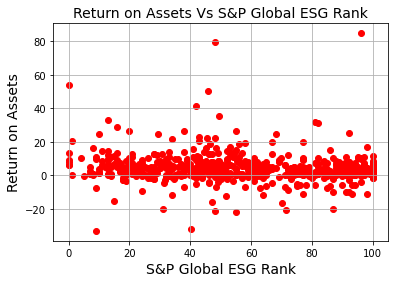

In [62]:
plt.scatter(ML_df_2019_vf['S&P Global ESG Rank'], ML_df_2019_vf['Return on Assets'], color='red')
plt.title('Return on Assets Vs S&P Global ESG Rank', fontsize=14)
plt.xlabel('S&P Global ESG Rank', fontsize=14)
plt.ylabel('Return on Assets', fontsize=14)
plt.grid(True)
plt.show()

No strong linear correlation visible for ESG Disclosure Score:

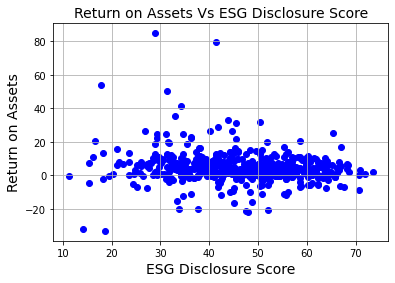

In [63]:
plt.scatter(ML_df_2019_vf['ESG Disclosure Score'], ML_df_2019_vf['Return on Assets'], color='blue')
plt.title('Return on Assets Vs ESG Disclosure Score', fontsize=14)
plt.xlabel('ESG Disclosure Score', fontsize=14)
plt.ylabel('Return on Assets', fontsize=14)
plt.grid(True)
plt.show()

Defining variables to train Multivariate Linear Regression model:

We are running a separate linear regression for all four independent variables that are ESG  Disclosure Score, Environmental Disclosure Score, Social Disclosure Score and Governance Disclosure Score. Moreover, these four linear regression models are duplicated for the two dependent variables ROA and Tobin's Q. Hence, in total 8 linear regressions.

In [64]:
#ROA and 2015-2019:

X_2015_2019_ESG = ML_df_2015_2019_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_ESG = ML_df_2015_2019_vf[['Return on Assets']]

X_2015_2019_EPS = ML_df_2015_2019_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_EPS = ML_df_2015_2019_vf[['Return on Assets']]

X_2015_2019_SPS = ML_df_2015_2019_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_SPS = ML_df_2015_2019_vf[['Return on Assets']]

X_2015_2019_GPS = ML_df_2015_2019_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_GPS = ML_df_2015_2019_vf[['Return on Assets']]

#ROA and 2015-2019:

print('----------')
print('2015-2019 ESG')
print('----------')
X_2015_2019_ESG = sm.add_constant(X_2015_2019_ESG) # adding a constant
model_2015_2019_ESG = sm.OLS(Y_2015_2019_ESG, X_2015_2019_ESG).fit()
predictions_2015_2019_ESG = model_2015_2019_ESG.predict(X_2015_2019_ESG) 
print_model_2015_2019_ESG = model_2015_2019_ESG.summary()
print(print_model_2015_2019_ESG)

print('----------')
print('2015-2019 EPS')
print('----------')
X_2015_2019_EPS = sm.add_constant(X_2015_2019_EPS) # adding a constant
model_2015_2019_EPS = sm.OLS(Y_2015_2019_EPS, X_2015_2019_EPS).fit()
predictions_2015_2019_EPS = model_2015_2019_EPS.predict(X_2015_2019_EPS) 
print_model_2015_2019_EPS = model_2015_2019_EPS.summary()
print(print_model_2015_2019_EPS)

print('----------')
print('2015-2019 SPS')
print('----------')
X_2015_2019_SPS = sm.add_constant(X_2015_2019_SPS) # adding a constant
model_2015_2019_SPS = sm.OLS(Y_2015_2019_SPS, X_2015_2019_SPS).fit()
predictions_2015_2019_SPS = model_2015_2019_SPS.predict(X_2015_2019_SPS) 
print_model_2015_2019_SPS = model_2015_2019_SPS.summary()
print(print_model_2015_2019_SPS)

print('----------')
print('2015-2019 GPS')
print('----------')
X_2015_2019_GPS = sm.add_constant(X_2015_2019_GPS) # adding a constant
model_2015_2019_GPS = sm.OLS(Y_2015_2019_GPS, X_2015_2019_GPS).fit()
predictions_2015_2019_GPS = model_2015_2019_GPS.predict(X_2015_2019_GPS) 
print_model_2015_2019_GPS = model_2015_2019_GPS.summary()
print(print_model_2015_2019_GPS)

----------
2015-2019 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.041
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     31.01
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           2.55e-25
Time:                        15:53:44   Log-Likelihood:                -11093.
No. Observations:                2884   AIC:                         2.220e+04
Df Residuals:                    2879   BIC:                         2.223e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [65]:
#Tobin's Q Ratio and 2015-2019:

X_2015_2019_ESG = ML_df_2015_2019_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_ESG = ML_df_2015_2019_vf[["Tobin's Q Ratio"]]

X_2015_2019_EPS = ML_df_2015_2019_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_EPS = ML_df_2015_2019_vf[["Tobin's Q Ratio"]]

X_2015_2019_SPS = ML_df_2015_2019_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_SPS = ML_df_2015_2019_vf[["Tobin's Q Ratio"]]

X_2015_2019_GPS = ML_df_2015_2019_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_2019_GPS = ML_df_2015_2019_vf[["Tobin's Q Ratio"]]

#Tobin's Q Ratio and 2015-2019:

print('----------')
print('2015-2019 ESG')
print('----------')
X_2015_2019_ESG = sm.add_constant(X_2015_2019_ESG) # adding a constant
model_2015_2019_ESG = sm.OLS(Y_2015_2019_ESG, X_2015_2019_ESG).fit()
predictions_2015_2019_ESG = model_2015_2019_ESG.predict(X_2015_2019_ESG) 
print_model_2015_2019_ESG = model_2015_2019_ESG.summary()
print(print_model_2015_2019_ESG)

print('----------')
print('2015-2019 EPS')
print('----------')
X_2015_2019_EPS = sm.add_constant(X_2015_2019_EPS) # adding a constant
model_2015_2019_EPS = sm.OLS(Y_2015_2019_EPS, X_2015_2019_EPS).fit()
predictions_2015_2019_EPS = model_2015_2019_EPS.predict(X_2015_2019_EPS) 
print_model_2015_2019_EPS = model_2015_2019_EPS.summary()
print(print_model_2015_2019_EPS)

print('----------')
print('2015-2019 SPS')
print('----------')
X_2015_2019_SPS = sm.add_constant(X_2015_2019_SPS) # adding a constant
model_2015_2019_SPS = sm.OLS(Y_2015_2019_SPS, X_2015_2019_SPS).fit()
predictions_2015_2019_SPS = model_2015_2019_SPS.predict(X_2015_2019_SPS) 
print_model_2015_2019_SPS = model_2015_2019_SPS.summary()
print(print_model_2015_2019_SPS)

print('----------')
print('2015-2019 GPS')
print('----------')
X_2015_2019_GPS = sm.add_constant(X_2015_2019_GPS) # adding a constant
model_2015_2019_GPS = sm.OLS(Y_2015_2019_GPS, X_2015_2019_GPS).fit()
predictions_2015_2019_GPS = model_2015_2019_GPS.predict(X_2015_2019_GPS) 
print_model_2015_2019_GPS = model_2015_2019_GPS.summary()
print(print_model_2015_2019_GPS)

----------
2015-2019 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.053
Method:                 Least Squares   F-statistic:                     41.60
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           5.97e-34
Time:                        15:53:48   Log-Likelihood:                -7072.0
No. Observations:                2884   AIC:                         1.415e+04
Df Residuals:                    2879   BIC:                         1.418e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

In [66]:
#ROA and 2015:

X_2015_ESG = ML_df_2015_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_ESG = ML_df_2015_vf[['Return on Assets']]

X_2015_EPS = ML_df_2015_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_EPS = ML_df_2015_vf[['Return on Assets']]

X_2015_SPS = ML_df_2015_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_SPS = ML_df_2015_vf[['Return on Assets']]

X_2015_GPS = ML_df_2015_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_GPS = ML_df_2015_vf[['Return on Assets']]

#ROA and 2015:

print('----------')
print('2015 ESG')
print('----------')
X_2015_ESG = sm.add_constant(X_2015_ESG) # adding a constant
model_2015_ESG = sm.OLS(Y_2015_ESG, X_2015_ESG).fit()
predictions_2015_ESG = model_2015_ESG.predict(X_2015_ESG) 
print_model_2015_ESG = model_2015_ESG.summary()
print(print_model_2015_ESG)

print('----------')
print('2015 EPS')
print('----------')
X_2015_EPS = sm.add_constant(X_2015_EPS) # adding a constant
model_2015_EPS = sm.OLS(Y_2015_EPS, X_2015_EPS).fit()
predictions_2015_EPS = model_2015_EPS.predict(X_2015_EPS) 
print_model_2015_EPS = model_2015_EPS.summary()
print(print_model_2015_EPS)

print('----------')
print('2015 SPS')
print('----------')
X_2015_SPS = sm.add_constant(X_2015_SPS) # adding a constant
model_2015_SPS = sm.OLS(Y_2015_SPS, X_2015_SPS).fit()
predictions_2015_SPS = model_2015_SPS.predict(X_2015_SPS) 
print_model_2015_SPS = model_2015_SPS.summary()
print(print_model_2015_SPS)

print('----------')
print('2015 GPS')
print('----------')
X_2015_GPS = sm.add_constant(X_2015_GPS) # adding a constant
model_2015_GPS = sm.OLS(Y_2015_GPS, X_2015_GPS).fit()
predictions_2015_GPS = model_2015_GPS.predict(X_2015_GPS) 
print_model_2015_GPS = model_2015_GPS.summary()
print(print_model_2015_GPS)

----------
2015 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.043
Method:                 Least Squares   F-statistic:                     7.256
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.06e-05
Time:                        15:53:58   Log-Likelihood:                -2176.3
No. Observations:                 559   AIC:                             4363.
Df Residuals:                     554   BIC:                             4384.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [67]:
#Tobin's Q and 2015:

X_2015_ESG = ML_df_2015_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_ESG = ML_df_2015_vf[["Tobin's Q Ratio"]]

X_2015_EPS = ML_df_2015_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_EPS = ML_df_2015_vf[["Tobin's Q Ratio"]]

X_2015_SPS = ML_df_2015_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_SPS = ML_df_2015_vf[["Tobin's Q Ratio"]]

X_2015_GPS = ML_df_2015_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2015_GPS = ML_df_2015_vf[["Tobin's Q Ratio"]]

#Tobin's Q and 2015:

print('----------')
print('2015 ESG')
print('----------')
X_2015_ESG = sm.add_constant(X_2015_ESG) # adding a constant
model_2015_ESG = sm.OLS(Y_2015_ESG, X_2015_ESG).fit()
predictions_2015_ESG = model_2015_ESG.predict(X_2015_ESG) 
print_model_2015_ESG = model_2015_ESG.summary()
print(print_model_2015_ESG)

print('----------')
print('2015 EPS')
print('----------')
X_2015_EPS = sm.add_constant(X_2015_EPS) # adding a constant
model_2015_EPS = sm.OLS(Y_2015_EPS, X_2015_EPS).fit()
predictions_2015_EPS = model_2015_EPS.predict(X_2015_EPS) 
print_model_2015_EPS = model_2015_EPS.summary()
print(print_model_2015_EPS)

print('----------')
print('2015 SPS')
print('----------')
X_2015_SPS = sm.add_constant(X_2015_SPS) # adding a constant
model_2015_SPS = sm.OLS(Y_2015_SPS, X_2015_SPS).fit()
predictions_2015_SPS = model_2015_SPS.predict(X_2015_SPS) 
print_model_2015_SPS = model_2015_SPS.summary()
print(print_model_2015_SPS)

print('----------')
print('2015 GPS')
print('----------')
X_2015_GPS = sm.add_constant(X_2015_GPS) # adding a constant
model_2015_GPS = sm.OLS(Y_2015_GPS, X_2015_GPS).fit()
predictions_2015_GPS = model_2015_GPS.predict(X_2015_GPS) 
print_model_2015_GPS = model_2015_GPS.summary()
print(print_model_2015_GPS)

----------
2015 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     5.805
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           0.000140
Time:                        15:54:01   Log-Likelihood:                -1389.0
No. Observations:                 559   AIC:                             2788.
Df Residuals:                     554   BIC:                             2810.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [68]:
#ROA and 2016:

X_2016_ESG = ML_df_2016_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_ESG = ML_df_2016_vf[['Return on Assets']]

X_2016_EPS = ML_df_2016_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_EPS = ML_df_2016_vf[['Return on Assets']]

X_2016_SPS = ML_df_2016_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_SPS = ML_df_2016_vf[['Return on Assets']]

X_2016_GPS = ML_df_2016_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_GPS = ML_df_2016_vf[['Return on Assets']]

#ROA and 2016:

print('----------')
print('2016 ESG')
print('----------')
X_2016_ESG = sm.add_constant(X_2016_ESG) # adding a constant
model_2016_ESG = sm.OLS(Y_2016_ESG, X_2016_ESG).fit()
predictions_2016_ESG = model_2016_ESG.predict(X_2016_ESG) 
print_model_2016_ESG = model_2016_ESG.summary()
print(print_model_2016_ESG)

print('----------')
print('2016 EPS')
print('----------')
X_2016_EPS = sm.add_constant(X_2016_EPS) # adding a constant
model_2016_EPS = sm.OLS(Y_2016_EPS, X_2016_EPS).fit()
predictions_2016_EPS = model_2016_EPS.predict(X_2016_EPS) 
print_model_2016_EPS = model_2016_EPS.summary()
print(print_model_2016_EPS)

print('----------')
print('2016 SPS')
print('----------')
X_2016_SPS = sm.add_constant(X_2016_SPS) # adding a constant
model_2016_SPS = sm.OLS(Y_2016_SPS, X_2016_SPS).fit()
predictions_2016_SPS = model_2016_SPS.predict(X_2016_SPS) 
print_model_2016_SPS = model_2016_SPS.summary()
print(print_model_2016_SPS)

print('----------')
print('2016 GPS')
print('----------')
X_2016_GPS = sm.add_constant(X_2016_GPS) # adding a constant
model_2016_GPS = sm.OLS(Y_2016_GPS, X_2016_GPS).fit()
predictions_2016_GPS = model_2016_GPS.predict(X_2016_GPS) 
print_model_2016_GPS = model_2016_GPS.summary()
print(print_model_2016_GPS)

----------
2016 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     4.872
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           0.000721
Time:                        15:54:04   Log-Likelihood:                -2232.1
No. Observations:                 566   AIC:                             4474.
Df Residuals:                     561   BIC:                             4496.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [69]:
#Tobin's Q and 2016:

X_2016_ESG = ML_df_2016_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_ESG = ML_df_2016_vf[["Tobin's Q Ratio"]]

X_2016_EPS = ML_df_2016_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_EPS = ML_df_2016_vf[["Tobin's Q Ratio"]]

X_2016_SPS = ML_df_2016_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_SPS = ML_df_2016_vf[["Tobin's Q Ratio"]]

X_2016_GPS = ML_df_2016_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2016_GPS = ML_df_2016_vf[["Tobin's Q Ratio"]]

#Tobin's Q and 2016:

print('----------')
print('2016 ESG')
print('----------')
X_2016_ESG = sm.add_constant(X_2016_ESG) # adding a constant
model_2016_ESG = sm.OLS(Y_2016_ESG, X_2016_ESG).fit()
predictions_2016_ESG = model_2016_ESG.predict(X_2016_ESG) 
print_model_2016_ESG = model_2016_ESG.summary()
print(print_model_2016_ESG)

print('----------')
print('2016 EPS')
print('----------')
X_2016_EPS = sm.add_constant(X_2016_EPS) # adding a constant
model_2016_EPS = sm.OLS(Y_2016_EPS, X_2016_EPS).fit()
predictions_2016_EPS = model_2016_EPS.predict(X_2016_EPS) 
print_model_2016_EPS = model_2016_EPS.summary()
print(print_model_2016_EPS)

print('----------')
print('2016 SPS')
print('----------')
X_2016_SPS = sm.add_constant(X_2016_SPS) # adding a constant
model_2016_SPS = sm.OLS(Y_2016_SPS, X_2016_SPS).fit()
predictions_2016_SPS = model_2016_SPS.predict(X_2016_SPS) 
print_model_2016_SPS = model_2016_SPS.summary()
print(print_model_2016_SPS)

print('----------')
print('2016 GPS')
print('----------')
X_2016_GPS = sm.add_constant(X_2016_GPS) # adding a constant
model_2016_GPS = sm.OLS(Y_2016_GPS, X_2016_GPS).fit()
predictions_2016_GPS = model_2016_GPS.predict(X_2016_GPS) 
print_model_2016_GPS = model_2016_GPS.summary()
print(print_model_2016_GPS)

----------
2016 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.059
Model:                            OLS   Adj. R-squared:                  0.052
Method:                 Least Squares   F-statistic:                     8.723
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           7.77e-07
Time:                        15:54:06   Log-Likelihood:                -1393.5
No. Observations:                 566   AIC:                             2797.
Df Residuals:                     561   BIC:                             2819.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [70]:
#ROA and 2017:

X_2017_ESG = ML_df_2017_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_ESG = ML_df_2017_vf[['Return on Assets']]

X_2017_EPS = ML_df_2017_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_EPS = ML_df_2017_vf[['Return on Assets']]

X_2017_SPS = ML_df_2017_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_SPS = ML_df_2017_vf[['Return on Assets']]

X_2017_GPS = ML_df_2017_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_GPS = ML_df_2017_vf[['Return on Assets']]

#ROA and 2017:

print('----------')
print('2017 ESG')
print('----------')
X_2017_ESG = sm.add_constant(X_2017_ESG) # adding a constant
model_2017_ESG = sm.OLS(Y_2017_ESG, X_2017_ESG).fit()
predictions_2017_ESG = model_2017_ESG.predict(X_2017_ESG) 
print_model_2017_ESG = model_2017_ESG.summary()
print(print_model_2017_ESG)

print('----------')
print('2017 EPS')
print('----------')
X_2017_EPS = sm.add_constant(X_2017_EPS) # adding a constant
model_2017_EPS = sm.OLS(Y_2017_EPS, X_2017_EPS).fit()
predictions_2017_EPS = model_2017_EPS.predict(X_2017_EPS) 
print_model_2017_EPS = model_2017_EPS.summary()
print(print_model_2017_EPS)

print('----------')
print('2017 SPS')
print('----------')
X_2017_SPS = sm.add_constant(X_2017_SPS) # adding a constant
model_2017_SPS = sm.OLS(Y_2017_SPS, X_2017_SPS).fit()
predictions_2017_SPS = model_2017_SPS.predict(X_2017_SPS) 
print_model_2017_SPS = model_2017_SPS.summary()
print(print_model_2017_SPS)

print('----------')
print('2017 GPS')
print('----------')
X_2017_GPS = sm.add_constant(X_2017_GPS) # adding a constant
model_2017_GPS = sm.OLS(Y_2017_GPS, X_2017_GPS).fit()
predictions_2017_GPS = model_2017_GPS.predict(X_2017_GPS) 
print_model_2017_GPS = model_2017_GPS.summary()
print(print_model_2017_GPS)

----------
2017 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                  0.019
Method:                 Least Squares   F-statistic:                     3.750
Date:                Sun, 03 Oct 2021   Prob (F-statistic):            0.00506
Time:                        15:54:07   Log-Likelihood:                -2278.6
No. Observations:                 579   AIC:                             4567.
Df Residuals:                     574   BIC:                             4589.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [71]:
#Tobin's Q and 2017:

X_2017_ESG = ML_df_2017_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_ESG = ML_df_2017_vf[["Tobin's Q Ratio"]]

X_2017_EPS = ML_df_2017_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_EPS = ML_df_2017_vf[["Tobin's Q Ratio"]]

X_2017_SPS = ML_df_2017_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_SPS = ML_df_2017_vf[["Tobin's Q Ratio"]]

X_2017_GPS = ML_df_2017_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2017_GPS = ML_df_2017_vf[["Tobin's Q Ratio"]]

#Tobin's Q and 2017:

print('----------')
print('2017 ESG')
print('----------')
X_2017_ESG = sm.add_constant(X_2017_ESG) # adding a constant
model_2017_ESG = sm.OLS(Y_2017_ESG, X_2017_ESG).fit()
predictions_2017_ESG = model_2017_ESG.predict(X_2017_ESG) 
print_model_2017_ESG = model_2017_ESG.summary()
print(print_model_2017_ESG)

print('----------')
print('2017 EPS')
print('----------')
X_2017_EPS = sm.add_constant(X_2017_EPS) # adding a constant
model_2017_EPS = sm.OLS(Y_2017_EPS, X_2017_EPS).fit()
predictions_2017_EPS = model_2017_EPS.predict(X_2017_EPS) 
print_model_2017_EPS = model_2017_EPS.summary()
print(print_model_2017_EPS)

print('----------')
print('2017 SPS')
print('----------')
X_2017_SPS = sm.add_constant(X_2017_SPS) # adding a constant
model_2017_SPS = sm.OLS(Y_2017_SPS, X_2017_SPS).fit()
predictions_2017_SPS = model_2017_SPS.predict(X_2017_SPS) 
print_model_2017_SPS = model_2017_SPS.summary()
print(print_model_2017_SPS)

print('----------')
print('2017 GPS')
print('----------')
X_2017_GPS = sm.add_constant(X_2017_GPS) # adding a constant
model_2017_GPS = sm.OLS(Y_2017_GPS, X_2017_GPS).fit()
predictions_2017_GPS = model_2017_GPS.predict(X_2017_GPS) 
print_model_2017_GPS = model_2017_GPS.summary()
print(print_model_2017_GPS)

----------
2017 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.055
Model:                            OLS   Adj. R-squared:                  0.049
Method:                 Least Squares   F-statistic:                     8.368
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.45e-06
Time:                        15:54:09   Log-Likelihood:                -1433.3
No. Observations:                 579   AIC:                             2877.
Df Residuals:                     574   BIC:                             2898.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [72]:
#ROA and 2018:

X_2018_ESG = ML_df_2018_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_ESG = ML_df_2018_vf[['Return on Assets']]

X_2018_EPS = ML_df_2018_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_EPS = ML_df_2018_vf[['Return on Assets']]

X_2018_SPS = ML_df_2018_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_SPS = ML_df_2018_vf[['Return on Assets']]

X_2018_GPS = ML_df_2018_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_GPS = ML_df_2018_vf[['Return on Assets']]

#ROA and 2018:

print('----------')
print('2018 ESG')
print('----------')
X_2018_ESG = sm.add_constant(X_2018_ESG) # adding a constant
model_2018_ESG = sm.OLS(Y_2018_ESG, X_2018_ESG).fit()
predictions_2018_ESG = model_2018_ESG.predict(X_2018_ESG) 
print_model_2018_ESG = model_2018_ESG.summary()
print(print_model_2018_ESG)

print('----------')
print('2018 EPS')
print('----------')
X_2018_EPS = sm.add_constant(X_2018_EPS) # adding a constant
model_2018_EPS = sm.OLS(Y_2018_EPS, X_2018_EPS).fit()
predictions_2018_EPS = model_2018_EPS.predict(X_2018_EPS) 
print_model_2018_EPS = model_2018_EPS.summary()
print(print_model_2018_EPS)

print('----------')
print('2018 SPS')
print('----------')
X_2018_SPS = sm.add_constant(X_2018_SPS) # adding a constant
model_2018_SPS = sm.OLS(Y_2018_SPS, X_2018_SPS).fit()
predictions_2018_SPS = model_2018_SPS.predict(X_2018_SPS) 
print_model_2018_SPS = model_2018_SPS.summary()
print(print_model_2018_SPS)

print('----------')
print('2018 GPS')
print('----------')
X_2018_GPS = sm.add_constant(X_2018_GPS) # adding a constant
model_2018_GPS = sm.OLS(Y_2018_GPS, X_2018_GPS).fit()
predictions_2018_GPS = model_2018_GPS.predict(X_2018_GPS) 
print_model_2018_GPS = model_2018_GPS.summary()
print(print_model_2018_GPS)

----------
2018 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.040
Method:                 Least Squares   F-statistic:                     7.120
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.33e-05
Time:                        15:54:12   Log-Likelihood:                -2219.0
No. Observations:                 588   AIC:                             4448.
Df Residuals:                     583   BIC:                             4470.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [73]:
#Tobin's Q and 2018:

X_2018_ESG = ML_df_2018_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_ESG = ML_df_2018_vf[["Tobin's Q Ratio"]]

X_2018_EPS = ML_df_2018_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_EPS = ML_df_2018_vf[["Tobin's Q Ratio"]]

X_2018_SPS = ML_df_2018_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_SPS = ML_df_2018_vf[["Tobin's Q Ratio"]]

X_2018_GPS = ML_df_2018_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2018_GPS = ML_df_2018_vf[["Tobin's Q Ratio"]]

#Tobin's Q and 2018:

print('----------')
print('2018 ESG')
print('----------')
X_2018_ESG = sm.add_constant(X_2018_ESG) # adding a constant
model_2018_ESG = sm.OLS(Y_2018_ESG, X_2018_ESG).fit()
predictions_2018_ESG = model_2018_ESG.predict(X_2018_ESG) 
print_model_2018_ESG = model_2018_ESG.summary()
print(print_model_2018_ESG)

print('----------')
print('2018 EPS')
print('----------')
X_2018_EPS = sm.add_constant(X_2018_EPS) # adding a constant
model_2018_EPS = sm.OLS(Y_2018_EPS, X_2018_EPS).fit()
predictions_2018_EPS = model_2018_EPS.predict(X_2018_EPS) 
print_model_2018_EPS = model_2018_EPS.summary()
print(print_model_2018_EPS)

print('----------')
print('2018 SPS')
print('----------')
X_2018_SPS = sm.add_constant(X_2018_SPS) # adding a constant
model_2018_SPS = sm.OLS(Y_2018_SPS, X_2018_SPS).fit()
predictions_2018_SPS = model_2018_SPS.predict(X_2018_SPS) 
print_model_2018_SPS = model_2018_SPS.summary()
print(print_model_2018_SPS)

print('----------')
print('2018 GPS')
print('----------')
X_2018_GPS = sm.add_constant(X_2018_GPS) # adding a constant
model_2018_GPS = sm.OLS(Y_2018_GPS, X_2018_GPS).fit()
predictions_2018_GPS = model_2018_GPS.predict(X_2018_GPS) 
print_model_2018_GPS = model_2018_GPS.summary()
print(print_model_2018_GPS)

----------
2018 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.057
Method:                 Least Squares   F-statistic:                     9.788
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.14e-07
Time:                        15:54:12   Log-Likelihood:                -1454.7
No. Observations:                 588   AIC:                             2919.
Df Residuals:                     583   BIC:                             2941.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [74]:
#ROA and 2019:

X_2019_ESG = ML_df_2019_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_ESG = ML_df_2019_vf[['Return on Assets']]

X_2019_EPS = ML_df_2019_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_EPS = ML_df_2019_vf[['Return on Assets']]

X_2019_SPS = ML_df_2019_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_SPS = ML_df_2019_vf[['Return on Assets']]

X_2019_GPS = ML_df_2019_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_GPS = ML_df_2019_vf[['Return on Assets']]

#ROA and 2019:

print('----------')
print('2019 ESG')
print('----------')
X_2019_ESG = sm.add_constant(X_2019_ESG) # adding a constant
model_2019_ESG = sm.OLS(Y_2019_ESG, X_2019_ESG).fit()
predictions_2019_ESG = model_2019_ESG.predict(X_2019_ESG) 
print_model_2019_ESG = model_2019_ESG.summary()
print(print_model_2019_ESG)

print('----------')
print('2019 EPS')
print('----------')
X_2019_EPS = sm.add_constant(X_2019_EPS) # adding a constant
model_2019_EPS = sm.OLS(Y_2019_EPS, X_2019_EPS).fit()
predictions_2019_EPS = model_2019_EPS.predict(X_2019_EPS) 
print_model_2019_EPS = model_2019_EPS.summary()
print(print_model_2019_EPS)

print('----------')
print('2019 SPS')
print('----------')
X_2019_SPS = sm.add_constant(X_2019_SPS) # adding a constant
model_2019_SPS = sm.OLS(Y_2019_SPS, X_2019_SPS).fit()
predictions_2019_SPS = model_2019_SPS.predict(X_2019_SPS) 
print_model_2019_SPS = model_2019_SPS.summary()
print(print_model_2019_SPS)

print('----------')
print('2019 GPS')
print('----------')
X_2019_GPS = sm.add_constant(X_2019_GPS) # adding a constant
model_2019_GPS = sm.OLS(Y_2019_GPS, X_2019_GPS).fit()
predictions_2019_GPS = model_2019_GPS.predict(X_2019_GPS) 
print_model_2019_GPS = model_2019_GPS.summary()
print(print_model_2019_GPS)

----------
2019 ESG
----------
                            OLS Regression Results                            
Dep. Variable:       Return on Assets   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     7.941
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           3.08e-06
Time:                        15:54:14   Log-Likelihood:                -2133.7
No. Observations:                 592   AIC:                             4277.
Df Residuals:                     587   BIC:                             4299.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------

In [75]:
#Tobin's Q and 2019:

X_2019_ESG = ML_df_2019_vf[['ESG Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_ESG = ML_df_2019_vf[["Tobin's Q Ratio"]]

X_2019_EPS = ML_df_2019_vf[['Environmental Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_EPS = ML_df_2019_vf[["Tobin's Q Ratio"]]

X_2019_SPS = ML_df_2019_vf[['Social Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_SPS = ML_df_2019_vf[["Tobin's Q Ratio"]]

X_2019_GPS = ML_df_2019_vf[['Governance Disclosure Score',"R & D Expenditure to Net Sales","Total Debt to Total Assets","Revenue"]] 
Y_2019_GPS = ML_df_2019_vf[["Tobin's Q Ratio"]]

#Tobin's Q and 2019:

print('----------')
print('2019 ESG')
print('----------')
X_2019_ESG = sm.add_constant(X_2019_ESG) # adding a constant
model_2019_ESG = sm.OLS(Y_2019_ESG, X_2019_ESG).fit()
predictions_2019_ESG = model_2019_ESG.predict(X_2019_ESG) 
print_model_2019_ESG = model_2019_ESG.summary()
print(print_model_2019_ESG)

print('----------')
print('2019 EPS')
print('----------')
X_2019_EPS = sm.add_constant(X_2019_EPS) # adding a constant
model_2019_EPS = sm.OLS(Y_2019_EPS, X_2019_EPS).fit()
predictions_2019_EPS = model_2019_EPS.predict(X_2019_EPS) 
print_model_2019_EPS = model_2019_EPS.summary()
print(print_model_2019_EPS)

print('----------')
print('2019 SPS')
print('----------')
X_2019_SPS = sm.add_constant(X_2019_SPS) # adding a constant
model_2019_SPS = sm.OLS(Y_2019_SPS, X_2019_SPS).fit()
predictions_2019_SPS = model_2019_SPS.predict(X_2019_SPS) 
print_model_2019_SPS = model_2019_SPS.summary()
print(print_model_2019_SPS)

print('----------')
print('2019 GPS')
print('----------')
X_2019_GPS = sm.add_constant(X_2019_GPS) # adding a constant
model_2019_GPS = sm.OLS(Y_2019_GPS, X_2019_GPS).fit()
predictions_2019_GPS = model_2019_GPS.predict(X_2019_GPS) 
print_model_2019_GPS = model_2019_GPS.summary()
print(print_model_2019_GPS)

----------
2019 ESG
----------
                            OLS Regression Results                            
Dep. Variable:        Tobin's Q Ratio   R-squared:                       0.099
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     16.08
Date:                Sun, 03 Oct 2021   Prob (F-statistic):           1.67e-12
Time:                        15:54:15   Log-Likelihood:                -1378.5
No. Observations:                 592   AIC:                             2767.
Df Residuals:                     587   BIC:                             2789.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------